In [68]:
%matplotlib inline
import numpy as np
import itertools
from math import factorial
import matplotlib.pyplot as plt

### 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [4]:
#n - number of trials
n = 100
c = np.random.randint(0, 37, size=n)
c

array([28, 28, 32, 14,  2, 33, 23, 16, 33,  8, 34, 25, 13, 17, 28,  5, 25,
       30, 35, 34, 35, 19, 20, 22, 31, 26, 35,  2,  7, 22, 12, 25, 19, 21,
       35, 16, 26,  6, 10,  2, 35, 20, 19, 21, 19, 14,  0, 29, 16, 11, 22,
       15, 17, 18, 17, 32, 21, 34, 36, 31, 32, 33, 13, 14, 28,  3,  6, 35,
       14, 25, 28, 25, 21, 20, 14, 30, 11,  0, 11, 11, 25,  3, 28, 28,  9,
       15,  5, 14, 12, 23, 27, 13,  3,  5, 28, 23, 13, 24,  8, 34])

### 2. 1)	Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере подбрасывания монетки.

Смоделируем ситуацию, когда бросают 3 монеты одновременно.

Проведем для этого n испытаний.

In [15]:
n = 560
c = np.random.randint(0, 2, size=n)
d = np.random.randint(0, 2, size=n)
f = np.random.randint(0, 2, size=n)

Найдем расчетную вероятность, когда на всех 3х монетах орел:

In [16]:
p = 0.5**3
p

0.125

Экспериментальная вероятность:

In [17]:
a = c[(c == 1) & (d == 1) & (f == 1)]
w = len(a) / n
w

0.13035714285714287

2)	Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [64]:
n = 1000

for i in range(10):
    i = np.round(np.random.randn(n),2)
    #print(i)
    i += i
    
i.shape

(1000,)

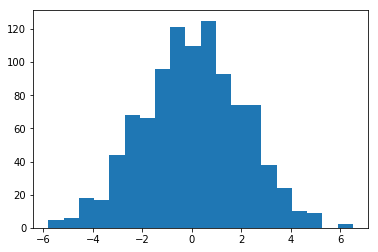

In [65]:
plt.hist(i, bins=20)
plt.show()

### 3.1)	Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [67]:
k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] ==2:
        k += 1
#print(a, b, c, d)
#print(x)
print(n, k, k/n)

10000 3797 0.3797


In [69]:
def C(k,n):
    return factorial(n)/(factorial(k) * factorial(n-k))

In [70]:
def bernulli(k, n, p):
    return C(k,n) * (p**k) * ((1-p) ** (n-k))

In [71]:
bernulli(2, 4, 0.5)

0.375

2)	Повторите расчеты, взяв другие значения n и k.

In [72]:
k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
f = np.random.randint(0, 2, n)
x = a + b + c + d + f
for i in range(0, n):
    if x[i] ==3:
        k += 1
print(n, k, k/n)

10000 3148 0.3148


In [73]:
bernulli(3, 5, 0.5)

0.3125

4. Повторите расчеты, взяв другие значения n и k.

In [74]:
for p in itertools.permutations('klm',2): #Размещение
    print(''.join(str(x) for x in p))

kl
km
lk
lm
mk
ml


In [79]:
for p in itertools.combinations('ABCDE',3):  #сочетания
    print(''.join(p))

ABC
ABD
ABE
ACD
ACE
ADE
BCD
BCE
BDE
CDE


In [80]:
for p in itertools.product('78',repeat=3): #Перестановки n!
    print(''.join(p))

777
778
787
788
877
878
887
888



5. Дополните код расчетом коэффициента корреляции x и y по формуле
 


In [97]:
n = 10000
r = 0.7
x = np.array(np.random.rand(n))
y = np.array(r*x + (1 - r)*np.random.rand(n))

In [100]:
corr_ = np.sum((x-x.mean()) * (y - y.mean()))/((np.sum((x - x.mean())**2) * np.sum((y - y.mean())**2))**0.5)
corr_

0.91913638714495

In [99]:
c = np.corrcoef(x,y)
c

array([[1.        , 0.91913639],
       [0.91913639, 1.        ]])